In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
company = pd.read_csv("/content/Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
company.iloc[:,6] = labelencoder.fit_transform(company.iloc[:,6])

company.head()

<ipython-input-4-8a3cfe2a9a82>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  company.iloc[:,6] = labelencoder.fit_transform(company.iloc[:,6])


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No


In [5]:
company['Sales'] = pd.cut(company.Sales,bins=(0,7.49,16.27),labels=['lowsales','highsales'])
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,highsales,138,73,11,276,120,0,42,17,Yes,Yes
1,highsales,111,48,16,260,83,1,65,10,Yes,Yes
2,highsales,113,35,10,269,80,2,59,12,Yes,Yes
3,lowsales,117,100,4,466,97,2,55,14,Yes,Yes
4,lowsales,141,64,3,340,128,0,38,13,Yes,No


In [6]:
company['Sales'].isna().sum()

1

In [7]:
company = company.dropna()
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
company2 = pd.get_dummies(company,columns=['Urban','US'])
company2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,highsales,138,73,11,276,120,0,42,17,0,1,0,1
1,highsales,111,48,16,260,83,1,65,10,0,1,0,1
2,highsales,113,35,10,269,80,2,59,12,0,1,0,1
3,lowsales,117,100,4,466,97,2,55,14,0,1,0,1
4,lowsales,141,64,3,340,128,0,38,13,0,1,1,0


In [9]:
company2.shape

(399, 13)

In [10]:
x = company2.iloc[:,1:]
y = company2.iloc[:,0]

Random forest

In [11]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)

model = RandomForestClassifier(n_estimators=num_trees, max_features = max_features)
results = cross_val_score(model, x, y, cv=kfold)

In [12]:
print("results of Random-Forest",results.mean())

results of Random-Forest 0.8144871794871795


AdaBoost Classification


In [13]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed = 7
kfold = KFold(n_splits = 10, random_state=seed, shuffle = True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state = seed)
results = cross_val_score(model, x, y, cv=kfold)

In [14]:
print(results.mean())

0.8521794871794872


<Axes: >

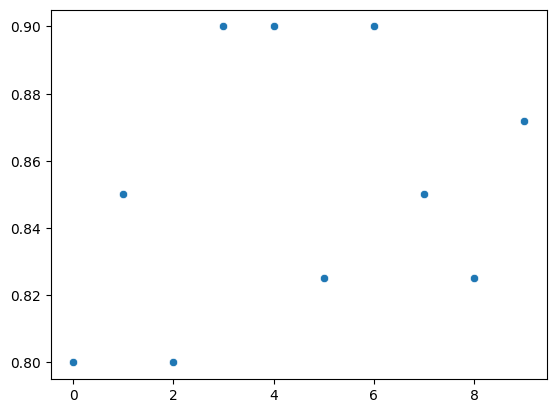

In [15]:
sns.scatterplot(results)

Stacking ensemble for classification

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

estimate =[ ]

model1 = LogisticRegression(max_iter = 1250)
estimate.append(('logistics',model1))

model2 = DecisionTreeClassifier()
estimate.append(('cart',model2))

model3 =SVC()
estimate.append(('svm',model3))


ensemble = VotingClassifier(estimate)
results1 = cross_val_score(ensemble, x, y, cv=kfold)

In [17]:
estimate


[('logistics', LogisticRegression(max_iter=1250)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]

In [18]:
results


array([0.8       , 0.85      , 0.8       , 0.9       , 0.9       ,
       0.825     , 0.9       , 0.85      , 0.825     , 0.87179487])

In [19]:
results.mean()

0.8521794871794872

Bagged Decision Trees for classification

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(estimator = cart, n_estimators = num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)

In [21]:
results

array([0.75      , 0.75      , 0.775     , 0.875     , 0.775     ,
       0.85      , 0.75      , 0.875     , 0.8       , 0.79487179])

In [22]:
results.mean()

0.7994871794871795

<Axes: >

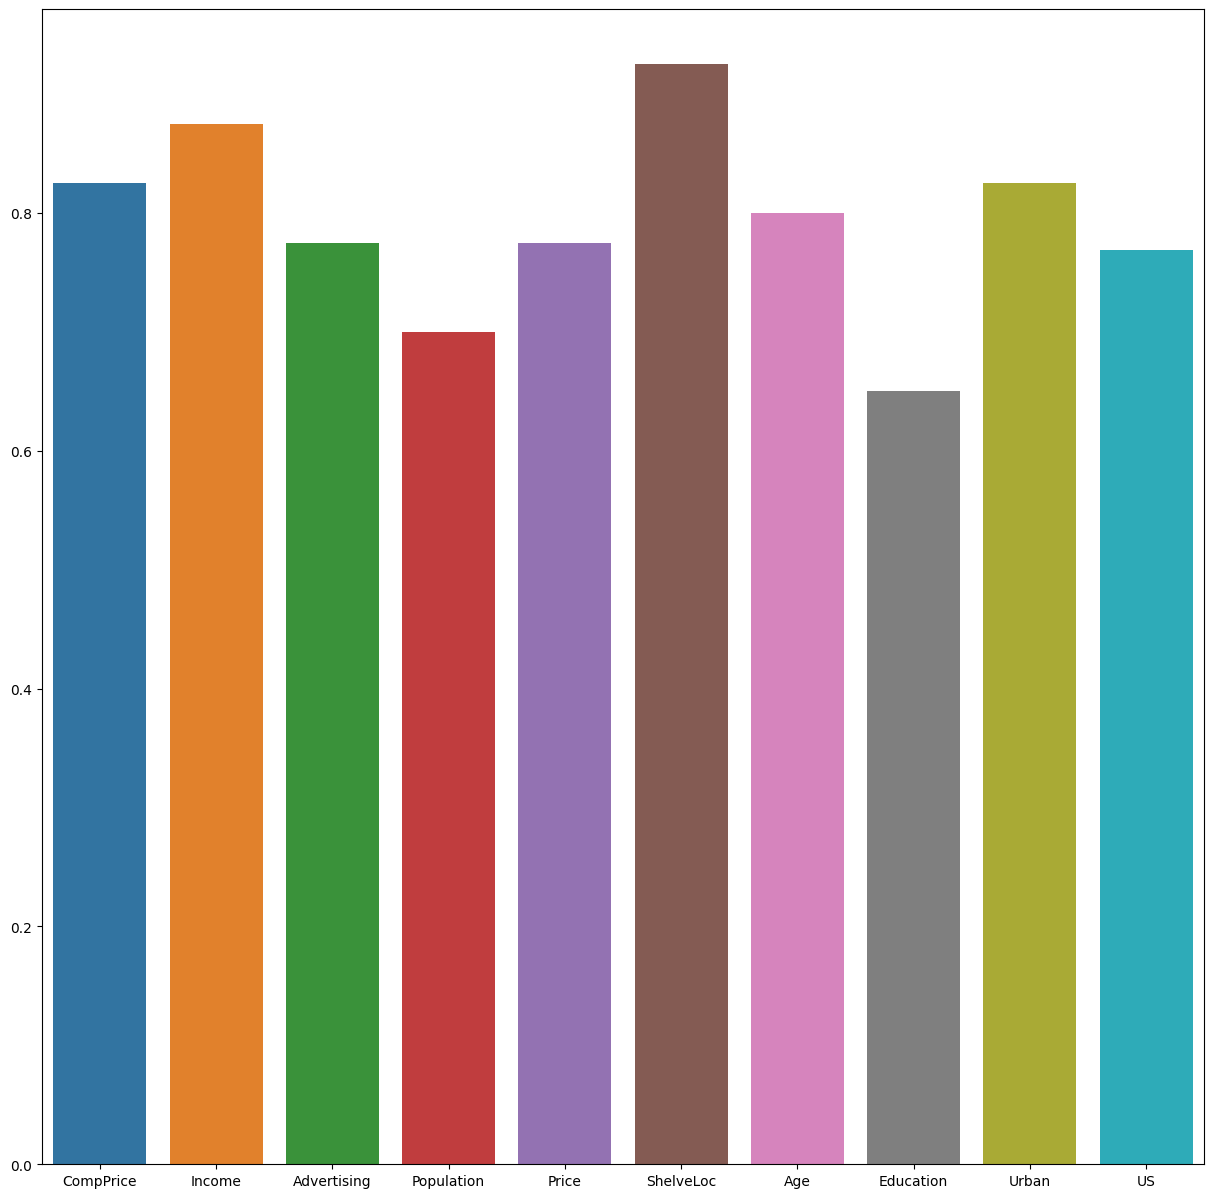

In [26]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.barplot( x= ["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"],y= results1)